# Лабораторная работа №5.
## Catboost. Градиентный бустинг

В достаточной степени подробно о градиентном бустинге описано в статье:
* https://habr.com/ru/company/ods/blog/327250/

Документация Catboost доступна по ссылке:
* https://tech.yandex.ru/catboost/

In [1]:
!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head() # четыре признака: sepal_length, sepal_width, petal_length, petal_width

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
species = pd.unique(iris.species) # классы, которые нужно предсказать

### Задание 1
Преобразуйте метки классов колонки species в численный вид. Просмотрите датасет, постройте графики (гистограммы, зависимости) и очистите его от дубликатов и пустых строк, если таковые имеются.

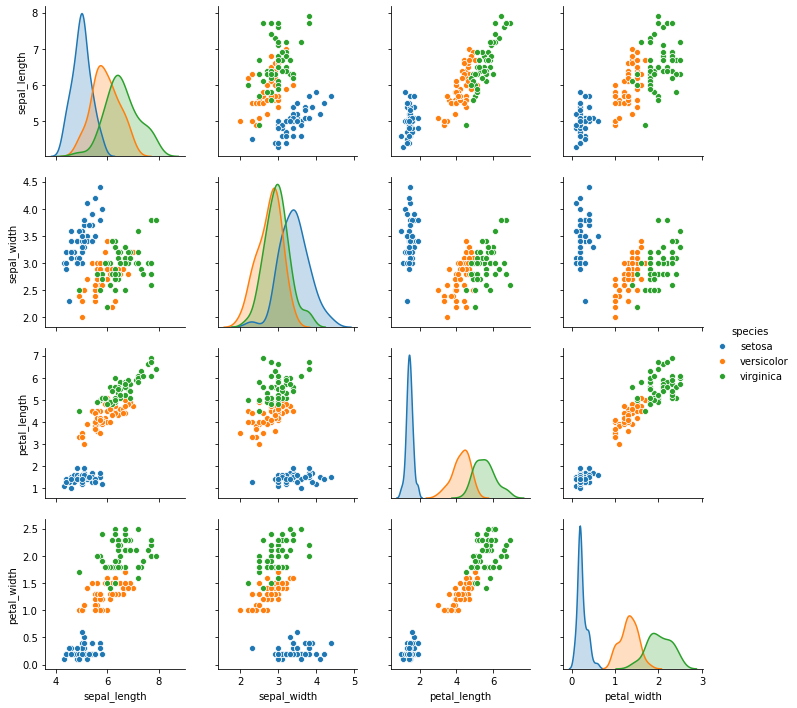

In [6]:
# Ваш код
# убираем пустые значения
iris.dropna()

# убираем дубликаты
iris_nodup = iris.drop_duplicates()

# переводим species в численный вид
iris_num = pd.get_dummies(iris_nodup)

sns.pairplot(iris, hue="species")
plt.show()

### Задание 2
Получите новые бинарные признаки, например: постройте график зависимости iris.sepal_length от iris.sepal_width и окрасьте точки в зависимости от iris.species. Мы видим, что один класс можно легко выделить, если взять iris.sepal_length < 6 и iris.sepal_width > 3. Создайте 5 бинарных признаков.

In [7]:
iris_num.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


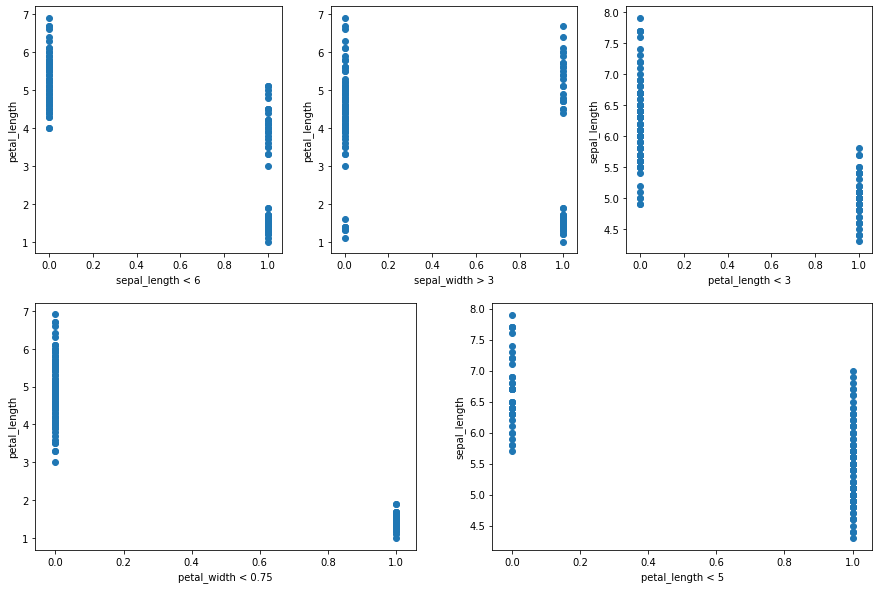

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
x = np.zeros(iris_num.shape[0])
x[np.where(iris_num.sepal_length < 6)] = 1
y = iris_num.petal_length

plt.xlabel('sepal_length < 6')
plt.ylabel('petal_length')
plt.scatter(x, y)

plt.subplot(2, 3, 2)
x = np.zeros(iris_num.shape[0])
x[np.where(iris_num.sepal_width > 3)] = 1
y = iris_num.petal_length

plt.xlabel('sepal_width > 3')
plt.ylabel('petal_length')
plt.scatter(x, y)

plt.subplot(2, 3, 3)
x = np.zeros(iris_num.shape[0])
x[np.where(iris_num.petal_length < 3)] = 1
y = iris_num.sepal_length

plt.xlabel('petal_length < 3')
plt.ylabel('sepal_length')
plt.scatter(x, y)

plt.subplot(2, 2, 3)
x = np.zeros(iris_num.shape[0])
x[np.where(iris_num.petal_width < 0.75)] = 1
y = iris_num.petal_length

plt.xlabel('petal_width < 0.75')
plt.ylabel('petal_length')
plt.scatter(x, y)

plt.subplot(2, 2, 4)
x = np.zeros(iris_num.shape[0])
x[np.where(iris_num.petal_length < 5)] = 1
y = iris_num.sepal_length

plt.xlabel('petal_length < 5')
plt.ylabel('sepal_length')
plt.scatter(x, y)

plt.show()

### Задание 3
По ссылке https://catboost.ai/docs/concepts/python-usages-examples.html изучите возможности применения catboost.
* Создайте модель Catboost.Classifier
* Перемешайте данные
* Отберите 10 % данных для валидации
* Создайте объекты Pool для классификационных данных и валидационных, заполните cat_features индексами бинарных признаков 
* Выберите функцию ошибки для данной задачи, объясните свой выбор
* Обучите модель и оцените ошибку на валидационных данных, объясните результат

In [9]:
# Ваш код
# создаем модель
from catboost import CatBoostClassifier
model = CatBoostClassifier(loss_function='MultiClass')

In [10]:
from sklearn.model_selection import train_test_split

# отбираем 10%
iris_x= iris_num[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_y = iris_num[['species_setosa', 'species_versicolor', 'species_virginica']]

iris_train_x, iris_val_x,iris_train_y, iris_val_y = train_test_split(iris_x, iris_y, shuffle=True, test_size=0.1)

In [11]:
from catboost import Pool

train_pool = Pool(iris_train_x, iris_train_y)
test_pool = Pool(iris_val_x, iris_val_y)

model.fit(train_pool, eval_set=test_pool)

0:	learn: -0.6704187	test: -0.6693948	best: -0.6693948 (0)	total: 71.6ms	remaining: 1m 11s
1:	learn: -0.6509576	test: -0.6510124	best: -0.6510124 (1)	total: 95.9ms	remaining: 47.8s
2:	learn: -0.6295300	test: -0.6277988	best: -0.6277988 (2)	total: 122ms	remaining: 40.4s
3:	learn: -0.6091381	test: -0.6068153	best: -0.6068153 (3)	total: 145ms	remaining: 36s
4:	learn: -0.5884194	test: -0.5859162	best: -0.5859162 (4)	total: 167ms	remaining: 33.2s
5:	learn: -0.5692635	test: -0.5691521	best: -0.5691521 (5)	total: 192ms	remaining: 31.8s
6:	learn: -0.5520457	test: -0.5526493	best: -0.5526493 (6)	total: 217ms	remaining: 30.7s
7:	learn: -0.5357075	test: -0.5358563	best: -0.5358563 (7)	total: 239ms	remaining: 29.6s
8:	learn: -0.5193639	test: -0.5185220	best: -0.5185220 (8)	total: 262ms	remaining: 28.9s
9:	learn: -0.5020371	test: -0.5006617	best: -0.5006617 (9)	total: 271ms	remaining: 26.8s
10:	learn: -0.4872076	test: -0.4852902	best: -0.4852902 (10)	total: 298ms	remaining: 26.8s
11:	learn: -0.4719

95:	learn: -0.0709856	test: -0.0774943	best: -0.0774943 (95)	total: 2.13s	remaining: 20s
96:	learn: -0.0698220	test: -0.0763628	best: -0.0763628 (96)	total: 2.17s	remaining: 20.2s
97:	learn: -0.0684081	test: -0.0750768	best: -0.0750768 (97)	total: 2.2s	remaining: 20.2s
98:	learn: -0.0673966	test: -0.0742414	best: -0.0742414 (98)	total: 2.23s	remaining: 20.3s
99:	learn: -0.0661939	test: -0.0728565	best: -0.0728565 (99)	total: 2.24s	remaining: 20.2s
100:	learn: -0.0652193	test: -0.0717159	best: -0.0717159 (100)	total: 2.27s	remaining: 20.2s
101:	learn: -0.0642270	test: -0.0704701	best: -0.0704701 (101)	total: 2.3s	remaining: 20.2s
102:	learn: -0.0631766	test: -0.0693175	best: -0.0693175 (102)	total: 2.33s	remaining: 20.3s
103:	learn: -0.0620975	test: -0.0680703	best: -0.0680703 (103)	total: 2.36s	remaining: 20.3s
104:	learn: -0.0610841	test: -0.0673544	best: -0.0673544 (104)	total: 2.4s	remaining: 20.4s
105:	learn: -0.0601706	test: -0.0664507	best: -0.0664507 (105)	total: 2.43s	remaining

190:	learn: -0.0208645	test: -0.0250401	best: -0.0250401 (190)	total: 4.24s	remaining: 18s
191:	learn: -0.0206640	test: -0.0248254	best: -0.0248254 (191)	total: 4.27s	remaining: 18s
192:	learn: -0.0204874	test: -0.0246173	best: -0.0246173 (192)	total: 4.29s	remaining: 18s
193:	learn: -0.0203290	test: -0.0244133	best: -0.0244133 (193)	total: 4.32s	remaining: 18s
194:	learn: -0.0201291	test: -0.0242422	best: -0.0242422 (194)	total: 4.35s	remaining: 17.9s
195:	learn: -0.0199635	test: -0.0240785	best: -0.0240785 (195)	total: 4.37s	remaining: 17.9s
196:	learn: -0.0198105	test: -0.0238853	best: -0.0238853 (196)	total: 4.39s	remaining: 17.9s
197:	learn: -0.0196169	test: -0.0236859	best: -0.0236859 (197)	total: 4.42s	remaining: 17.9s
198:	learn: -0.0193423	test: -0.0233617	best: -0.0233617 (198)	total: 4.43s	remaining: 17.8s
199:	learn: -0.0190918	test: -0.0231174	best: -0.0231174 (199)	total: 4.44s	remaining: 17.8s
200:	learn: -0.0188708	test: -0.0229142	best: -0.0229142 (200)	total: 4.47s	re

286:	learn: -0.0091844	test: -0.0116397	best: -0.0116397 (286)	total: 5.83s	remaining: 14.5s
287:	learn: -0.0091042	test: -0.0115404	best: -0.0115404 (287)	total: 5.84s	remaining: 14.4s
288:	learn: -0.0090424	test: -0.0114529	best: -0.0114529 (288)	total: 5.85s	remaining: 14.4s
289:	learn: -0.0089795	test: -0.0113669	best: -0.0113669 (289)	total: 5.86s	remaining: 14.4s
290:	learn: -0.0089094	test: -0.0113027	best: -0.0113027 (290)	total: 5.88s	remaining: 14.3s
291:	learn: -0.0088407	test: -0.0112397	best: -0.0112397 (291)	total: 5.89s	remaining: 14.3s
292:	learn: -0.0087853	test: -0.0111810	best: -0.0111810 (292)	total: 5.91s	remaining: 14.3s
293:	learn: -0.0087393	test: -0.0111289	best: -0.0111289 (293)	total: 5.92s	remaining: 14.2s
294:	learn: -0.0086893	test: -0.0110869	best: -0.0110869 (294)	total: 5.94s	remaining: 14.2s
295:	learn: -0.0086438	test: -0.0110333	best: -0.0110333 (295)	total: 5.96s	remaining: 14.2s
296:	learn: -0.0085716	test: -0.0109432	best: -0.0109432 (296)	total: 

380:	learn: -0.0056267	test: -0.0074503	best: -0.0074503 (380)	total: 7.19s	remaining: 11.7s
381:	learn: -0.0055984	test: -0.0074145	best: -0.0074145 (381)	total: 7.2s	remaining: 11.6s
382:	learn: -0.0055702	test: -0.0073742	best: -0.0073742 (382)	total: 7.22s	remaining: 11.6s
383:	learn: -0.0055590	test: -0.0073620	best: -0.0073620 (383)	total: 7.24s	remaining: 11.6s
384:	learn: -0.0055470	test: -0.0073478	best: -0.0073478 (384)	total: 7.26s	remaining: 11.6s
385:	learn: -0.0055211	test: -0.0073209	best: -0.0073209 (385)	total: 7.27s	remaining: 11.6s
386:	learn: -0.0054884	test: -0.0072785	best: -0.0072785 (386)	total: 7.28s	remaining: 11.5s
387:	learn: -0.0054578	test: -0.0072380	best: -0.0072380 (387)	total: 7.29s	remaining: 11.5s
388:	learn: -0.0054365	test: -0.0072139	best: -0.0072139 (388)	total: 7.3s	remaining: 11.5s
389:	learn: -0.0054173	test: -0.0071903	best: -0.0071903 (389)	total: 7.32s	remaining: 11.4s
390:	learn: -0.0053965	test: -0.0071734	best: -0.0071734 (390)	total: 7.

469:	learn: -0.0041652	test: -0.0057019	best: -0.0057019 (469)	total: 8.62s	remaining: 9.72s
470:	learn: -0.0041564	test: -0.0056944	best: -0.0056944 (470)	total: 8.64s	remaining: 9.7s
471:	learn: -0.0041466	test: -0.0056883	best: -0.0056883 (471)	total: 8.66s	remaining: 9.69s
472:	learn: -0.0041272	test: -0.0056622	best: -0.0056622 (472)	total: 8.66s	remaining: 9.65s
473:	learn: -0.0041130	test: -0.0056405	best: -0.0056405 (473)	total: 8.68s	remaining: 9.63s
474:	learn: -0.0041021	test: -0.0056293	best: -0.0056293 (474)	total: 8.69s	remaining: 9.61s
475:	learn: -0.0040916	test: -0.0056169	best: -0.0056169 (475)	total: 8.71s	remaining: 9.59s
476:	learn: -0.0040748	test: -0.0055926	best: -0.0055926 (476)	total: 8.73s	remaining: 9.57s
477:	learn: -0.0040582	test: -0.0055690	best: -0.0055690 (477)	total: 8.73s	remaining: 9.54s
478:	learn: -0.0040430	test: -0.0055502	best: -0.0055502 (478)	total: 8.74s	remaining: 9.51s
479:	learn: -0.0040363	test: -0.0055442	best: -0.0055442 (479)	total: 8

560:	learn: -0.0032290	test: -0.0045170	best: -0.0045170 (560)	total: 10s	remaining: 7.86s
561:	learn: -0.0032242	test: -0.0045129	best: -0.0045129 (561)	total: 10.1s	remaining: 7.84s
562:	learn: -0.0032135	test: -0.0044973	best: -0.0044973 (562)	total: 10.1s	remaining: 7.82s
563:	learn: -0.0032083	test: -0.0044939	best: -0.0044939 (563)	total: 10.1s	remaining: 7.8s
564:	learn: -0.0031962	test: -0.0044774	best: -0.0044774 (564)	total: 10.1s	remaining: 7.78s
565:	learn: -0.0031866	test: -0.0044645	best: -0.0044645 (565)	total: 10.1s	remaining: 7.75s
566:	learn: -0.0031796	test: -0.0044588	best: -0.0044588 (566)	total: 10.1s	remaining: 7.74s
567:	learn: -0.0031702	test: -0.0044461	best: -0.0044461 (567)	total: 10.1s	remaining: 7.72s
568:	learn: -0.0031584	test: -0.0044299	best: -0.0044299 (568)	total: 10.2s	remaining: 7.69s
569:	learn: -0.0031467	test: -0.0044139	best: -0.0044139 (569)	total: 10.2s	remaining: 7.66s
570:	learn: -0.0031393	test: -0.0044084	best: -0.0044084 (570)	total: 10.

658:	learn: -0.0026062	test: -0.0037407	best: -0.0037407 (658)	total: 11.6s	remaining: 6s
659:	learn: -0.0025992	test: -0.0037302	best: -0.0037302 (659)	total: 11.6s	remaining: 5.99s
660:	learn: -0.0025948	test: -0.0037253	best: -0.0037253 (660)	total: 11.6s	remaining: 5.97s
661:	learn: -0.0025913	test: -0.0037227	best: -0.0037227 (661)	total: 11.7s	remaining: 5.95s
662:	learn: -0.0025874	test: -0.0037194	best: -0.0037194 (662)	total: 11.7s	remaining: 5.93s
663:	learn: -0.0025823	test: -0.0037128	best: -0.0037128 (663)	total: 11.7s	remaining: 5.92s
664:	learn: -0.0025763	test: -0.0037043	best: -0.0037043 (664)	total: 11.7s	remaining: 5.9s
665:	learn: -0.0025706	test: -0.0036974	best: -0.0036974 (665)	total: 11.7s	remaining: 5.88s
666:	learn: -0.0025633	test: -0.0036868	best: -0.0036868 (666)	total: 11.7s	remaining: 5.86s
667:	learn: -0.0025596	test: -0.0036825	best: -0.0036825 (667)	total: 11.8s	remaining: 5.84s
668:	learn: -0.0025563	test: -0.0036797	best: -0.0036797 (668)	total: 11.8

750:	learn: -0.0022095	test: -0.0032631	best: -0.0032631 (750)	total: 13.2s	remaining: 4.38s
751:	learn: -0.0022043	test: -0.0032549	best: -0.0032549 (751)	total: 13.2s	remaining: 4.36s
752:	learn: -0.0022022	test: -0.0032532	best: -0.0032532 (752)	total: 13.3s	remaining: 4.35s
753:	learn: -0.0021999	test: -0.0032507	best: -0.0032507 (753)	total: 13.3s	remaining: 4.34s
754:	learn: -0.0021952	test: -0.0032431	best: -0.0032431 (754)	total: 13.3s	remaining: 4.32s
755:	learn: -0.0021909	test: -0.0032370	best: -0.0032370 (755)	total: 13.3s	remaining: 4.3s
756:	learn: -0.0021866	test: -0.0032302	best: -0.0032302 (756)	total: 13.3s	remaining: 4.28s
757:	learn: -0.0021810	test: -0.0032219	best: -0.0032219 (757)	total: 13.3s	remaining: 4.26s
758:	learn: -0.0021752	test: -0.0032135	best: -0.0032135 (758)	total: 13.3s	remaining: 4.24s
759:	learn: -0.0021729	test: -0.0032107	best: -0.0032107 (759)	total: 13.4s	remaining: 4.22s
760:	learn: -0.0021713	test: -0.0032071	best: -0.0032071 (760)	total: 1

845:	learn: -0.0019000	test: -0.0028441	best: -0.0028441 (845)	total: 15s	remaining: 2.73s
846:	learn: -0.0018987	test: -0.0028428	best: -0.0028428 (846)	total: 15s	remaining: 2.71s
847:	learn: -0.0018959	test: -0.0028384	best: -0.0028384 (847)	total: 15.1s	remaining: 2.7s
848:	learn: -0.0018940	test: -0.0028371	best: -0.0028371 (848)	total: 15.1s	remaining: 2.68s
849:	learn: -0.0018910	test: -0.0028325	best: -0.0028325 (849)	total: 15.1s	remaining: 2.67s
850:	learn: -0.0018887	test: -0.0028282	best: -0.0028282 (850)	total: 15.1s	remaining: 2.65s
851:	learn: -0.0018843	test: -0.0028218	best: -0.0028218 (851)	total: 15.2s	remaining: 2.63s
852:	learn: -0.0018816	test: -0.0028199	best: -0.0028199 (852)	total: 15.2s	remaining: 2.61s
853:	learn: -0.0018798	test: -0.0028174	best: -0.0028174 (853)	total: 15.2s	remaining: 2.6s
854:	learn: -0.0018765	test: -0.0028134	best: -0.0028134 (854)	total: 15.2s	remaining: 2.58s
855:	learn: -0.0018749	test: -0.0028116	best: -0.0028116 (855)	total: 15.2s	

941:	learn: -0.0016872	test: -0.0025629	best: -0.0025629 (941)	total: 17.1s	remaining: 1.05s
942:	learn: -0.0016854	test: -0.0025614	best: -0.0025614 (942)	total: 17.1s	remaining: 1.03s
943:	learn: -0.0016839	test: -0.0025594	best: -0.0025594 (943)	total: 17.1s	remaining: 1.01s
944:	learn: -0.0016820	test: -0.0025560	best: -0.0025560 (944)	total: 17.1s	remaining: 998ms
945:	learn: -0.0016811	test: -0.0025549	best: -0.0025549 (945)	total: 17.2s	remaining: 980ms
946:	learn: -0.0016802	test: -0.0025538	best: -0.0025538 (946)	total: 17.2s	remaining: 962ms
947:	learn: -0.0016780	test: -0.0025503	best: -0.0025503 (947)	total: 17.2s	remaining: 944ms
948:	learn: -0.0016766	test: -0.0025486	best: -0.0025486 (948)	total: 17.2s	remaining: 926ms
949:	learn: -0.0016741	test: -0.0025461	best: -0.0025461 (949)	total: 17.2s	remaining: 908ms
950:	learn: -0.0016729	test: -0.0025445	best: -0.0025445 (950)	total: 17.3s	remaining: 890ms
951:	learn: -0.0016710	test: -0.0025426	best: -0.0025426 (951)	total: 